In [9]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [18]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/개발_전처리/백엔드개발.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,Who We AreSaaS Platform 팀은 SSPSupplySide Platf...,하나 이상의 서버 프로그래밍 언어에 능숙합니다 테스트하기 좋은 코드를 작성합니다 ...
1,VitalCare의 벡엔드 시스템 설계 및 개발 Python Golang을 이용한...,Python 또는 Golang을 활용한 백엔드 개발 경험이 5년 이상 또는 그에 ...
2,VAN 서버 관리VAN 다중화가상계좌 연동결제수단 관리 시스템,관련 업무 최소 4년 이상대규모 시스템 업무 최소 6년 이상은행 VAN 시스템 업...
3,백엔드 API 개발 및 아키텍쳐링 백엔드 API 개발 및 서비스 개편 DBPostg...,백엔드 업무 경력 5년 이상 보유하신 분 RDB NoSQL 설계 및 활용 능력 N...
4,백엔드 아키텍처 설계 및 개선 MSA 기반의 서비스 개발 프론트엔드백엔드 API ...,Java Spring Framework 기반 실무 개발 경력 5년 이상 주도적으로...
...,...,...
351,프론트엔드백엔드의 설계 구현 운영 및 개발인력의 Lead성능테스트 도구를 활용한 서...,커뮤니케이션커뮤니티커머스 서비스의 서버개발에 대한 높은 이해도 및 경력10년 이상기...
352,채팅 서비스 회원 API 개발 커뮤니티 서비스 회원 API 개발 회원 관련 어드민...,Java 기반 개발 실무경력 REST API Spring Boot 기반 정보통신 ...
353,React Native 앱 개발,새로운 분야에 대한 학습을 두려워하지 않는 개발자커뮤니케이션 및 협업에 능숙한 개발...
354,React Native 앱 개발,새로운 분야에 대한 학습을 두려워하지 않는 개발자커뮤니케이션 및 협업에 능숙한 개발...


In [19]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,Who We AreSaaS Platform 팀은 SSPSupplySide Platf...
1,VitalCare의 벡엔드 시스템 설계 및 개발 Python Golang을 이용한...
2,VAN 서버 관리VAN 다중화가상계좌 연동결제수단 관리 시스템
3,백엔드 API 개발 및 아키텍쳐링 백엔드 API 개발 및 서비스 개편 DBPostg...
4,백엔드 아키텍처 설계 및 개선 MSA 기반의 서비스 개발 프론트엔드백엔드 API ...
...,...
351,프론트엔드백엔드의 설계 구현 운영 및 개발인력의 Lead성능테스트 도구를 활용한 서...
352,채팅 서비스 회원 API 개발 커뮤니티 서비스 회원 API 개발 회원 관련 어드민...
353,React Native 앱 개발
354,React Native 앱 개발


In [20]:
#txt로 저장
i = 'C:/Users/User/Desktop/개발_전처리/백엔드개발(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [21]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\nWho We AreSaaS Platform 팀은 SSPSupplySide Platform의 백엔드 시스템 개발과 운영을 담당합니다 SSP 서비스에 필요한 인증 광고 할당 광고 참여 리워드 적립 정산 등 다양한 플랫폼을 개발하고 있고 대형 매체사와 광고 플랫폼 연동을 위한 개발을 하고 있습니다 또한 MAU 1500만 규모의 대규모 트래픽 환경에서 시스템을 효율적으로 운영하기 위한 노력도 지속해서 기울입니다What Youll Do SDK와 통신하기 위한 API를 개발 및 운영합니다 카카오페이 카카오뱅크 등 대형 매체사에 연동된 서비스를 운영합니다 신규 대형 매체사와 버즈빌 광고 시스템 연동 개발을 지원합니다 인증 광고 할당참여 리워드 적립 정산 등 팀에서 운영하고 있는 플랫폼을 개선하고 관리합니다 MAU 1500만 규모의 대규모 트래픽 환경에서 안정적으로 서비스 운영이 가능하도록 운영 환경을 지속적으로 개선합니다\n VitalCare의 벡엔드 시스템 설계 및 개발 Python Golang을 이용한 서비스 구축 및 유지보수 MySQL MongoDB 와의 통합 및 데이터 처리 병원 내의 의료 데이터를 안전하게 처리하고 저장하기 위한 기술적인 솔루션 제공 성능 최적화 및 보안 이슈에 대한 지속적인 모니터링과 개선 테스트 코드 작성 및 유지보수 테스트 자동화를 통한 서비스와 코드 품질 보장\nVAN 서버 관리VAN 다중화가상계좌 연동결제수단 관리 시스템\n백엔드 API 개발 및 아키텍쳐링 백엔드 API 개발 및 서비스 개편 DBPostgresql 설계 및 구축 Message streaming service environment 설계 및 구축  Redis  Kafka  MQ 서버 및 인프라 자동화 단계적 마이크로 서비스 전환 배포 및 운영 관리 \n 백엔드 아키텍처 설계 및 개선 MSA 기반의 서비스 개발 프론트엔드백엔드 API 서버 개발 운영 대용량 데이터를 실시간으로 처리하는 아키텍처 설계 구축 운영 문제 해결을 위해 새로운 기술 검토 도입 오토위니 개발

In [22]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '팀',
 '의',
 '백엔드',
 '시스템',
 '개발',
 '운영',
 '담당',
 '서비스',
 '인증',
 '광고',
 '할당',
 '광고',
 '참여',
 '리',
 '워드',
 '적립',
 '정산',
 '등',
 '플랫폼',
 '개발',
 '대형',
 '체사',
 '광고',
 '플랫폼',
 '연동',
 '위',
 '개발',
 '또한',
 '규모',
 '대규모',
 '트래픽',
 '환경',
 '시스템',
 '효율',
 '운영',
 '위',
 '노력',
 '지속',
 '통신',
 '위',
 '를',
 '개발',
 '및',
 '운영',
 '카카오',
 '페이',
 '카카오',
 '뱅크',
 '등',
 '대형',
 '체사',
 '연동',
 '서비스',
 '운영',
 '신규',
 '대형',
 '체사',
 '버즈',
 '광고',
 '시스템',
 '연동',
 '개발',
 '지원',
 '인증',
 '광고',
 '할당',
 '참여',
 '리',
 '워드',
 '적립',
 '정산',
 '등',
 '팀',
 '운영',
 '플랫폼',
 '개선',
 '관리',
 '규모',
 '대규모',
 '트래픽',
 '환경',
 '안정',
 '서비스',
 '운영',
 '운영',
 '환경',
 '지속',
 '개선',
 '의',
 '벡엔드',
 '시스템',
 '설계',
 '및',
 '개발',
 '이용',
 '서비스',
 '구축',
 '및',
 '유지',
 '보수',
 '통합',
 '및',
 '데이터',
 '처리',
 '병원',
 '내의',
 '의료',
 '데이터',
 '처리',
 '저장',
 '위',
 '기술',
 '솔루션',
 '제공',
 '성능',
 '최적화',
 '및',
 '보안',
 '이슈',
 '대한',
 '지속',
 '모니터링',
 '개선',
 '테스트',
 '코드',
 '작성',
 '및',
 '유지',
 '보수',
 '테스트',
 '자동화',
 '통한',
 '서비스',
 '코드',
 '품질',
 '보장',
 '서버',
 '관리',
 '다중화',
 '가

In [23]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

12450
1334


FreqDist({'개발': 850, '및': 621, '서비스': 452, '운영': 253, '설계': 226, '시스템': 205, '관리': 186, '백엔드': 184, '위': 154, '데이터': 149, ...})

In [24]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [25]:
stop_words = [
    '환경','기술','지식','개발','사용','이해','기반','필수','가능','우대','경험','관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '의',
 '백엔드',
 '시스템',
 '운영',
 '담당',
 '서비스',
 '인증',
 '광고',
 '할당',
 '광고',
 '참여',
 '리',
 '워드',
 '적립',
 '정산',
 '플랫폼',
 '대형',
 '체사',
 '광고',
 '플랫폼',
 '연동',
 '또한',
 '규모',
 '대규모',
 '트래픽',
 '시스템',
 '효율',
 '운영',
 '노력',
 '지속',
 '통신',
 '를',
 '운영',
 '카카오',
 '페이',
 '카카오',
 '뱅크',
 '대형',
 '체사',
 '연동',
 '서비스',
 '운영',
 '대형',
 '체사',
 '버즈',
 '광고',
 '시스템',
 '연동',
 '지원',
 '인증',
 '광고',
 '할당',
 '참여',
 '리',
 '워드',
 '적립',
 '정산',
 '운영',
 '플랫폼',
 '개선',
 '관리',
 '규모',
 '대규모',
 '트래픽',
 '안정',
 '서비스',
 '운영',
 '운영',
 '지속',
 '개선',
 '의',
 '벡엔드',
 '시스템',
 '설계',
 '이용',
 '서비스',
 '구축',
 '유지',
 '보수',
 '통합',
 '데이터',
 '처리',
 '병원',
 '내의',
 '의료',
 '데이터',
 '처리',
 '저장',
 '솔루션',
 '제공',
 '성능',
 '최적화',
 '보안',
 '이슈',
 '지속',
 '모니터링',
 '개선',
 '테스트',
 '코드',
 '작성',
 '유지',
 '보수',
 '테스트',
 '자동화',
 '통한',
 '서비스',
 '코드',
 '품질',
 '보장',
 '서버',
 '관리',
 '다중화',
 '가상',
 '계좌',
 '연동',
 '결제',
 '수단',
 '관리',
 '시스템',
 '백엔드',
 '아키텍쳐',
 '링',
 '백엔드',
 '서비스',
 '개편',
 '설계',
 '구축',
 '설계',
 '구축',
 '서버',
 '인프라',
 '자동화',
 '단계',
 '마이크로',
 '서비스',
 '전환',
 '배포',

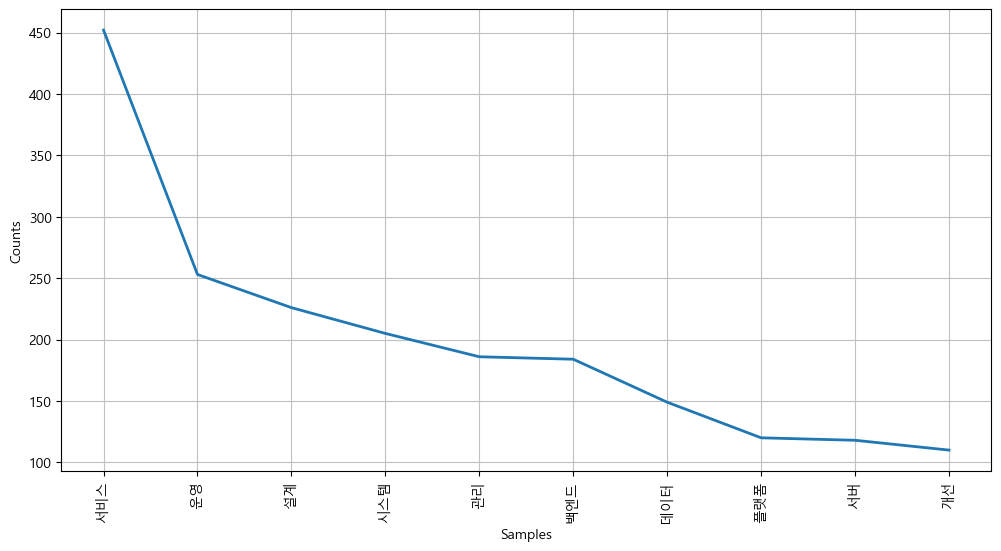

In [26]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

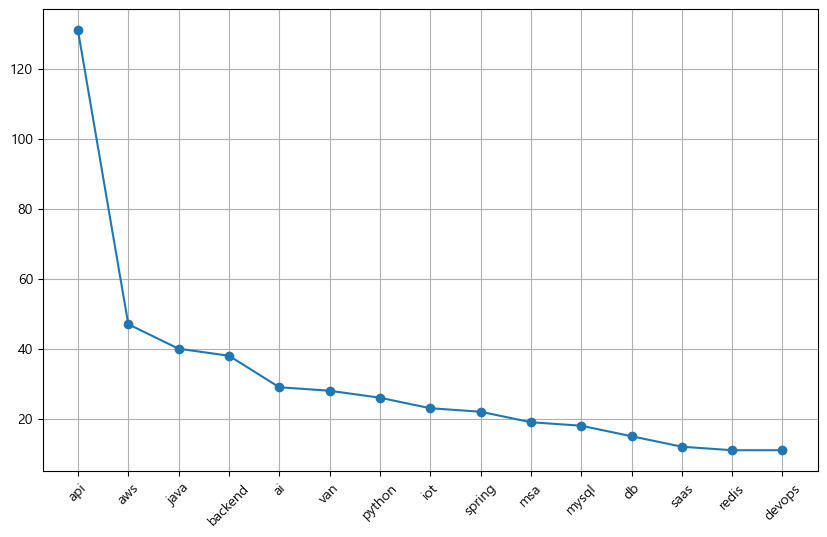

In [28]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['rest','restful','native','open','play','pd']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)